In [18]:
import numpy as np

with open("./bi2se3-bands-bulk-soc-02.dat", "r") as file:
    lines = file.readlines()

data = np.array([])
for line in lines[1:]:
    line = line.strip()
    if line:
        numbers = line.split()
        for num in numbers:
            data=np.append(data,float(num)) 
[nbands,nkpts] = lines[0].split(",")
nbands = int(nbands.split()[2])
nkpts = int(nkpts.split()[1])
print(len(data),nbands,nkpts)

band=np.zeros((nkpts,nbands+1))
print(band.shape)

34587 424 81
(81, 425)


In [44]:
kpts=np.zeros((nkpts,3))
for i in range(nkpts):
    start=i*(nbands+3)
    kpts[i] = data[start:start+3]
for i in range(nbands):
    start=i*(nbands)
    band[:,i+1] = data[3+i::(nbands+3)]

print(kpts)
print(band)


distances = np.linalg.norm(kpts[1:] - kpts[0:-1], axis=1)
distances=np.append(0,distances)
band[:,0]=distances.cumsum()

np.savetxt("band-custom.gnu",band,fmt='%.3f')


[[0.       0.       0.      ]
 [0.       0.       0.003632]
 [0.       0.       0.007265]
 [0.       0.       0.010897]
 [0.       0.       0.014529]
 [0.       0.       0.018162]
 [0.       0.       0.021794]
 [0.       0.       0.025427]
 [0.       0.       0.029059]
 [0.       0.       0.032691]
 [0.       0.       0.036324]
 [0.       0.       0.039956]
 [0.       0.       0.043588]
 [0.       0.       0.047221]
 [0.       0.       0.050853]
 [0.       0.       0.054486]
 [0.       0.       0.058118]
 [0.       0.       0.06175 ]
 [0.       0.       0.065383]
 [0.       0.       0.069015]
 [0.       0.       0.072647]
 [0.025    0.043301 0.069015]
 [0.05     0.086603 0.065383]
 [0.075    0.129904 0.06175 ]
 [0.1      0.173205 0.058118]
 [0.125    0.216506 0.054486]
 [0.15     0.259808 0.050853]
 [0.175    0.303109 0.047221]
 [0.2      0.34641  0.043588]
 [0.225    0.389711 0.039956]
 [0.25     0.433013 0.036324]
 [0.275    0.476314 0.032691]
 [0.3      0.519615 0.029059]
 [0.325   

(8.0, 12.0)

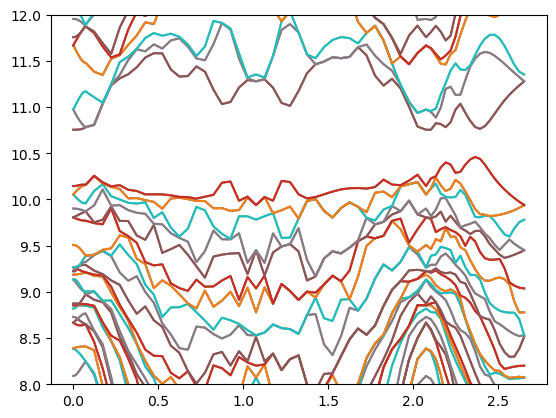

In [43]:
import matplotlib.pyplot as plt


plt.plot(band[:,0],band[:,1:])

plt.ylim([8,12])